In [13]:

import qiskit_mps_initializer
from qiskit import QuantumCircuit

In [14]:
from qiskit_mps_initializer.datatypes import QuantumState

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


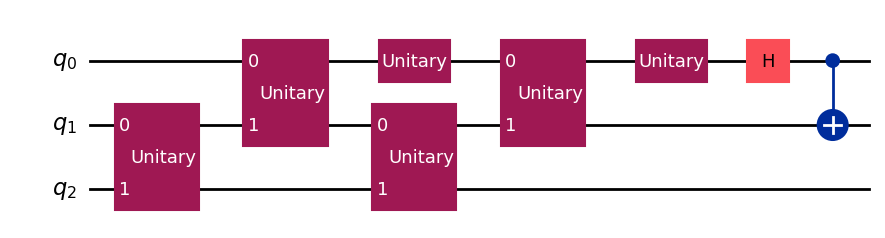

In [15]:
psi = [1, 2, 4, 6, 3, 6, 2, 1]
state = QuantumState.from_dense_data(psi, normalize=True)

circuit = state.generate_mps_initializer_circuit(number_of_layers=2)
circuit.h(0)
circuit.cx(0, 1)
circuit.decompose

circuit.draw('mpl')

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
Final statevector:
 Statevector([ 0.5+0.000000e+00j, -0.5+6.123234e-17j,  0.5-6.123234e-17j,
              0.5+0.000000e+00j],
            dims=(2, 2))


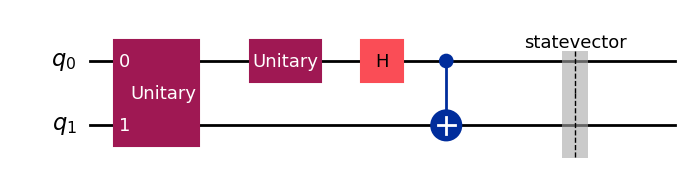

In [16]:
import numpy as np
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit_mps_initializer.datatypes import QuantumState  # Assuming installed correctly

# Bell state vector
psi_bell = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]

# Create QuantumState from Bell vector
state = QuantumState.from_dense_data(psi_bell, normalize=True)

# Generate circuit to initialize Bell state
circuit = state.generate_mps_initializer_circuit(number_of_layers=1)

# Optional: Add more gates after initialization
circuit.h(0)
circuit.cx(0, 1)

# Simulate and print statevector
backend = Aer.get_backend("aer_simulator")
circuit.save_statevector()
compiled = transpile(circuit, backend)
result = backend.run(compiled).result()

final_state = result.get_statevector()
print("Final statevector:\n", final_state)

# Draw circuit
circuit.draw('mpl')


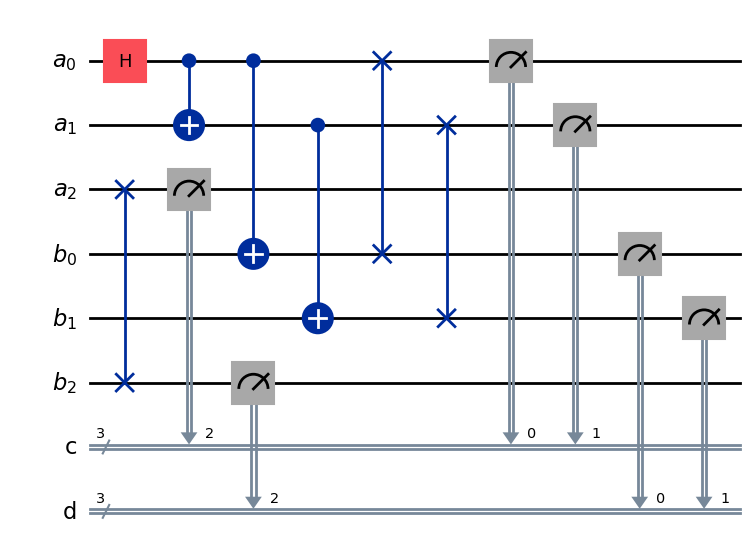

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr1 = QuantumRegister(3, name='a')
qr2 = QuantumRegister(3, name='b')
cr1 = ClassicalRegister(3, name='c')
cr2 = ClassicalRegister(3, name='d')
circuit = QuantumCircuit(qr1, qr2, cr1, cr2)
circuit.h(qr1[0])
circuit.cx(qr1[0], qr1[1])
circuit.cx(qr1[0], qr2[0])
circuit.cx(qr1[1], qr2[1])
circuit.swap(qr2, qr1)
circuit.measure(qr1, cr1,)
circuit.measure(qr2, cr2)
circuit.decompose
circuit.draw('mpl')

In [26]:
from qiskit import transpiler

In [ ]:
from qiskit import transpiler